<a href="https://colab.research.google.com/github/anggad08/DMC_ML_COURSE/blob/main/DEEPLERANING-VERSION.ULTIMA-CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving CANCER.zip to CANCER.zip


Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.2617 - loss: 5.3944 - val_accuracy: 0.3465 - val_loss: 4.9847 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4319 - loss: 4.3267 - val_accuracy: 0.3581 - val_loss: 5.0660 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4922 - loss: 3.7822 - val_accuracy: 0.4478 - val_loss: 4.0250 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5438 - loss: 3.2777 - val_accuracy: 0.5094 - val_loss: 3.4437 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5865 - loss: 2.8501 - val_accuracy: 0.5559 - val_loss: 3.0342 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6260 - loss: 2.4922 - val_accuracy: 0.6418 - val_loss: 2.4036 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step -

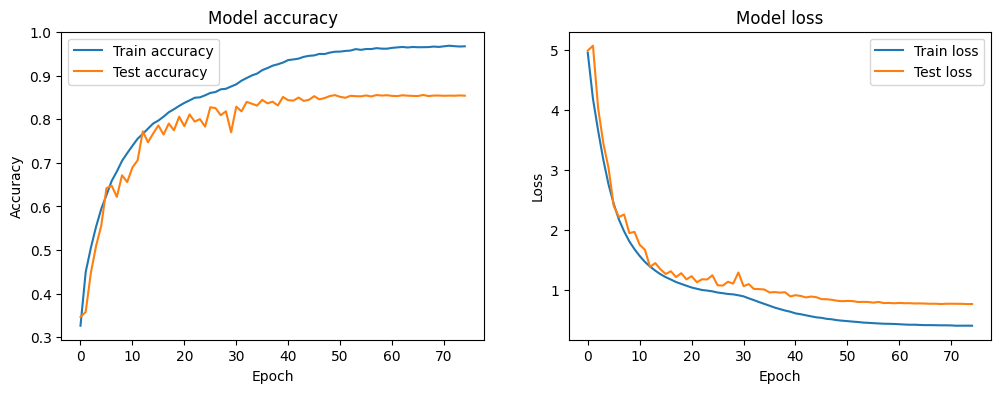

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Aseguramos que se devuelve como float
    else:
        return float(lr * tf.math.exp(-0.1))  # Reduce el learning rate exponencialmente después de 30 épocas y se devuelve como float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
import zipfile
with zipfile.ZipFile('CANCER.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [3]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/75
782/782 [==============================] - 22s 18ms/step - loss: 4.9597 - accuracy: 0.3321 - val_loss: 5.8009 - val_accuracy: 0.2877 - lr: 1.0000e-04
Epoch 2/75
782/782 [==============================] - 12s 15ms/step - loss: 4.2097 - accuracy: 0.4481 - val_loss: 4.7436 - val_accuracy: 0.3909 - lr: 1.0000e-04
Epoch 3/75
782/782 [==============================] - 12s 15ms/step - loss: 3.6918 - accuracy: 0.5039 - val_loss: 4.1874 - val_accuracy: 0.4528 - lr: 1.0000e-04
Epoch 4/75
782/782 [==============================] - 12s 15ms/step - loss: 3.2113 - accuracy: 0.5524 - val_loss: 3.9964 - val_accuracy: 0.4605 - lr: 1.0000e-04
Epoch 5/75
782/782 [==============================] - 12s 15ms/step - loss: 2.8133 - accuracy: 0.5888 - val_loss: 2.8813 - val_accuracy: 0.5783 - lr: 1.0000e-04
Epoch 6/75
782/782 [==============================] - 12s 15ms/step - loss: 2.4880 - accuracy: 0.6190 - val_loss: 2.8512 - val_a

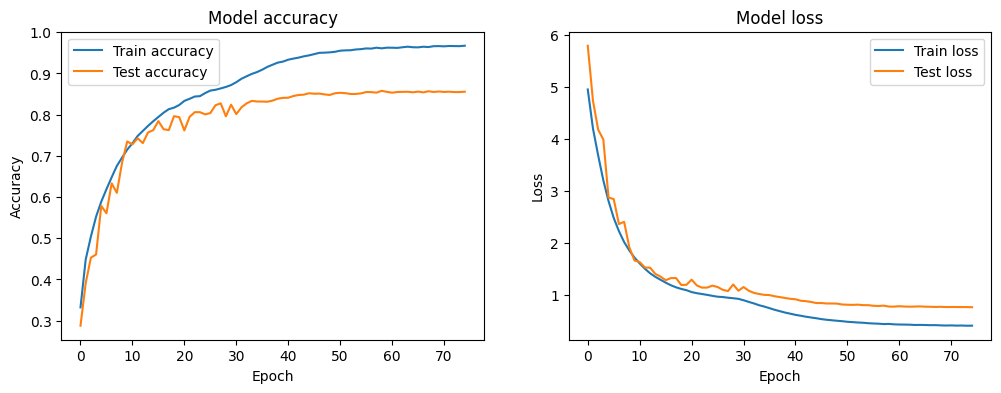

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Aseguramos que se devuelve como float
    else:
        return float(lr * tf.math.exp(-0.1))  # Reduce el learning rate exponencialmente después de 30 épocas y se devuelve como float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Found 16000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 126s 245ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
500/500 [==============================] - 136s 272ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
500/500 [==============================] - 137s 274ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
500/500 [==============================] - 120s 239ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
500/500 [==============================] - 119s 239ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
500/500 [==============================] - 138s 276ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
500/500 [==============================] - 121s 243ms/step - loss: 0.0000e+0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


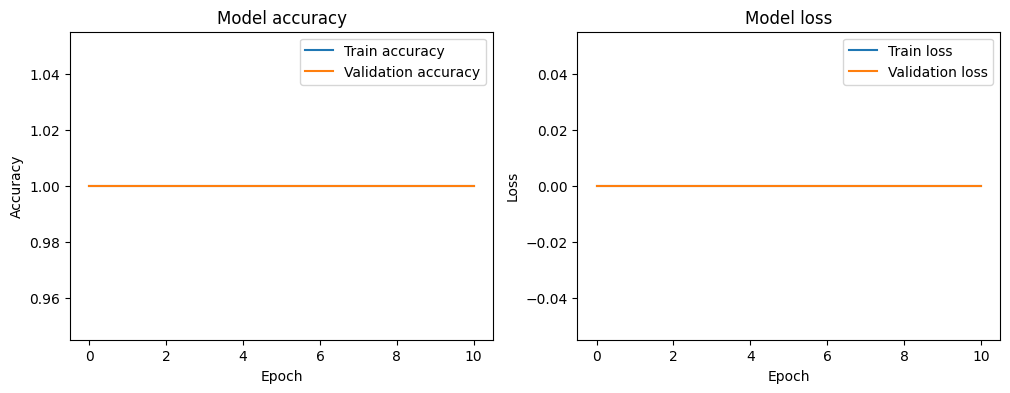

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import json

# Paso 1: Data Augmentation para aumentar la variabilidad de los datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2  # Reservar 20% de los datos para validación
)

# Paso 2: Cargar los datos de entrenamiento y validación
train_dir = '/content/dataset'  # Cambia esta ruta a la ubicación de tu dataset de imágenes de cáncer
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Aumentamos el tamaño de las imágenes a 128x128
    batch_size=32,
    class_mode='categorical',  # Si tienes más de 2 clases, si solo tienes 2 usa 'binary'
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Aumentamos el tamaño de las imágenes a 128x128
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Paso 3: Cargar el modelo preentrenado MobileNetV2 para Transfer Learning
base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelamos las capas del modelo base

# Paso 4: Construir el modelo añadiendo capas personalizadas
model = Sequential([
    base_model,  # Modelo preentrenado
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.7),  # Aumentamos el dropout para reducir el sobreajuste
    Dense(train_generator.num_classes, activation='softmax')  # Ajustar el número de clases dinámicamente
])

# Paso 5: Compilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Paso 6: Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Paso 7: Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=50,  # Mantener las épocas
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

# Paso 8: Guardar el modelo entrenado
model.save('Cancer-CNN-TransferLearning-Model-64neurons-Dropout07.h5')

# Guardar la configuración del modelo
model_json = model.to_json()
with open("cancer_model_config.json", "w") as json_file:
    json_file.write(model_json)

# Guardar el historial del entrenamiento
with open('cancer_training_history.json', 'w') as f:
    json.dump(history.history, f)

# Paso 9: Graficar los resultados de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp -r /content/dataset /content/drive/MyDrive/

In [1]:
!cp -r /content/drive/MyDrive/dataset /content/


cp: cannot stat '/content/drive/MyDrive/dataset': No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/

'008.DOC (Recovered).gdoc'
'2018-12-13_20-46-18 (1).png'
'2024-04-08 13-55-53.mkv'
'2024-07-30 14-11-37.mkv'
 21_La_Oralidad_Proceso_Laboral_Vene.pdf
'2do PARCIAL DE DERECHO ROMANO.gdoc'
'36. Ley de la Procuraduria General de la Republica  - Revolucion Bolivariana - Habilitantes (1).doc'
'ANGEL GADEA.pdf'
'BPMN Guide reference OMG2006-02-01.pdf'
 CERTIFICADO_RELACIONES_EXTERIORES.pdf
 Chequeo_Pre_requisitos_WL_slopr71.doc
 Classroom
'CODIGO ORGANICO PROCESAL PENAL.pdf'
'Colab Notebooks'
'COMPARATIVO COPP 2009 2012.pdf'
 COMPETENCIAS_JCADM.xlsx
 Contratista_inherencia_conexidad.pdf
'Contratos de extranjeros_IP  (2).xlsx'
'CPS 19 y 20 de Junio2015.jpg'
'Cur-Esp-AG-v8[3] (1) (1).docx'
 dataset
'DERECHO ADMINISTRATIVO Y JURISDICCION CONTENCIOSO.docx'
'Desarrollo_Detalles (5).pdf'
 Dialnet-LaOratoriaForenseEnLaCausaPenal-3160114.pdf
 Fase_previa_y_oralidad.pdf
'Fuerza Mayor I - MONICA GUERRERO.pdf'
'GAMMES PROGRAMING.PNG'
 GCQ2006.pdf
'glosario (3).doc'
'GUIA_PROCESAL_CIVIL_II (1).docx'
'HI

In [4]:
!cd dataset


/bin/bash: line 1: cd: dataset: No such file or directory


In [5]:
!ls /content/drive/MyDrive/dataset/CANCER


all_benign  all_early  all_pre	all_pro


In [6]:
!cp -r /content/drive/MyDrive/dataset /content/

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.2648 - loss: 5.3824 - val_accuracy: 0.3206 - val_loss: 5.2066 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4335 - loss: 4.3242 - val_accuracy: 0.3935 - val_loss: 4.6688 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4981 - loss: 3.7851 - val_accuracy: 0.4645 - val_loss: 3.8928 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5413 - loss: 3.2927 - val_accuracy: 0.4674 - val_loss: 3.7571 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5788 - loss: 2.8692 - val_accuracy: 0.5752 - val_loss: 2.8229 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6164 - loss: 2.5168 - val_accuracy: 0.6233 - val_loss: 2.4532 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/ste

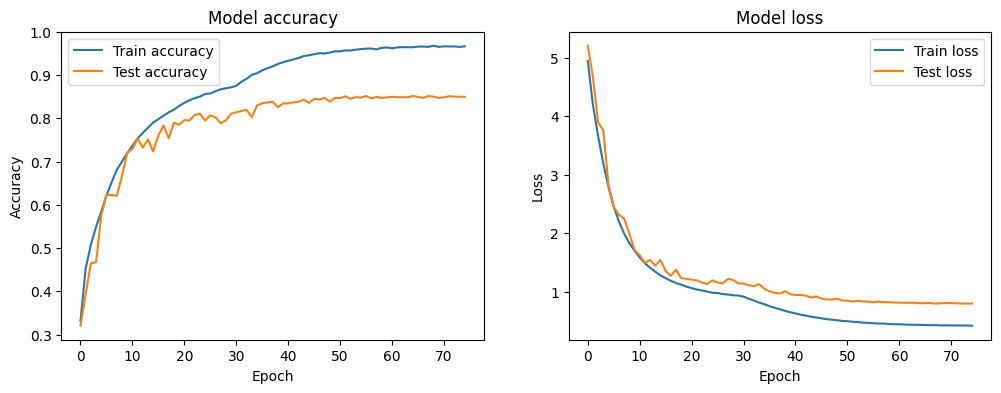

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Aseguramos que se devuelve como float
    else:
        return float(lr * tf.math.exp(-0.1))  # Reduce el learning rate exponencialmente después de 30 épocas y se devuelve como float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Capa convolucional 1 con regularización L2 y dropout ajustado
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa convolucional 2 con regularización L2 y dropout ajustado
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional 3 con regularización L2 y dropout ajustado
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Capa convolucional adicional
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Dropout ajustado

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capa densa con regularización L2 y dropout ajustado
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))  # Dropout ajustado

# Capa de salida con 10 neuronas (una por cada clase de CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje más baja
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con más épocas, early stopping y tasa de aprendizaje dinámica
history = model.fit(X_train, y_train, epochs=75, batch_size=64,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 70ms/step - accuracy: 0.2442 - loss: 5.4618 - val_accuracy: 0.3492 - val_loss: 5.0191 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.3938 - loss: 4.4201 - val_accuracy: 0.3860 - val_loss: 5.0542 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.4580 - loss: 3.8704 - val_accuracy: 0.4190 - val_loss: 4.3493 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.4892 - loss: 3.4032 - val_accuracy: 0.4683 - val_loss: 3.7518 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.5182 - loss: 2.9831 - val_accuracy: 0.4726 - val_loss: 3.4550 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.5482 - loss: 2.6421 - val_accuracy: 0.4857 - val_loss: 3.2355 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accurac

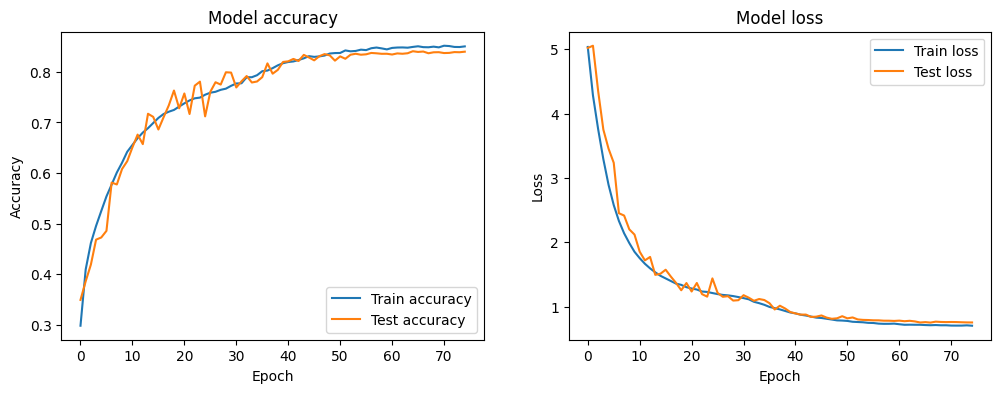

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Nueva importación

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=75,
                              validation_data=(X_test, y_test),
                              verbose=1,
                              callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.1468 - loss: 2.4102 - val_accuracy: 0.2845 - val_loss: 2.0654 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 54ms/step - accuracy: 0.2325 - loss: 2.0994 - val_accuracy: 0.2869 - val_loss: 1.9874 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.2575 - loss: 2.0411 - val_accuracy: 0.3023 - val_loss: 1.9413 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.2680 - loss: 2.0020 - val_accuracy: 0.3118 - val_loss: 1.9118 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.2874 - loss: 1.9679 - val_accuracy: 0.3298 - val_loss: 1.8773 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.2939 - loss: 1.9499 - val_accuracy: 0.3471 - val_loss: 1.8563 - learning_rate: 1.0000e-04
E


Test accuracy: 0.41780000925064087
Modelo guardado exitosamente como 'modelo_transfer_learning.h5'


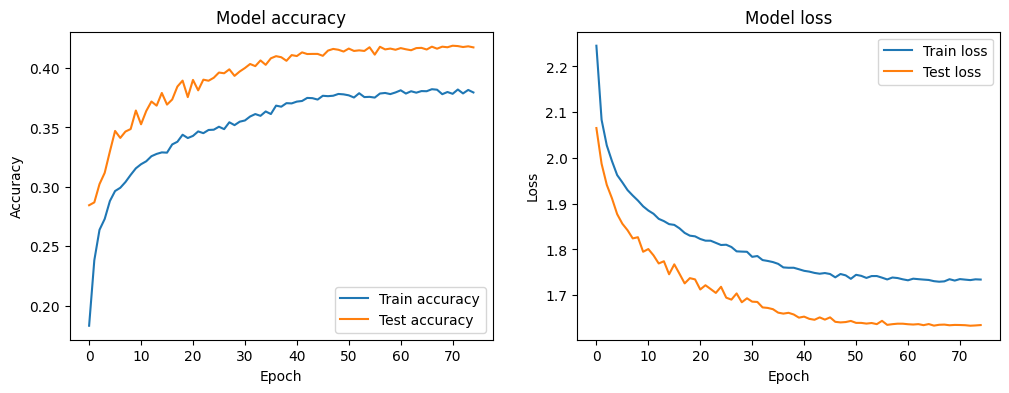

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Nueva importación
from tensorflow.keras.applications import ResNet50  # Importar modelo preentrenado

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Paso 3: Definir el modelo con Transfer Learning usando ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Crear el modelo completo
model = Sequential([
    base_model,  # Usamos ResNet50 como base
    GlobalAveragePooling2D(),  # Agregamos una capa de pooling global
    Dense(512, activation='relu'),  # Agregamos una capa densa
    Dropout(0.4),  # Agregamos Dropout para evitar el sobreajuste
    Dense(10, activation='softmax')  # Capa de salida con 10 clases (CIFAR-10)
])

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos y Transfer Learning
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=75,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Paso 8: Guardar el modelo completo en formato H5 (arquitectura, pesos, optimizador)
model.save('modelo_transfer_learning.h5')

print("Modelo guardado exitosamente como 'modelo_transfer_learning.h5'")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


EL ANTERIOR ENTRENAMIENTO UTILIZO IMAGENES DE OBJETOS UTILIZANDO TRANFERLEARNING POR LO QUE NO FUNICONO.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10  # Reemplazar por tu dataset si es necesario
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Paso 1: Cargar el dataset CIFAR-10 (reemplazar con tus datos si es necesario)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)  # Cambia '10' por el número de clases de tu dataset
y_test = to_categorical(y_test, 10)

# Aumento de datos más agresivo
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # Cambia '10' por el número de clases de tu dataset

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10  # Reemplazar por tu dataset si es necesario
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Paso 1: Cargar el dataset CIFAR-10 (reemplazar con tus datos si es necesario)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)  # Cambia '10' por el número de clases de tu dataset
y_test = to_categorical(y_test, 10)

# Aumento de datos más agresivo
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # Cambia '10' por el número de clases de tu dataset

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado.h5')

print("Modelo guardado exitosamente como 'modelo_mejorado.h5'")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - accuracy: 0.1804 - loss: 5.8793 - val_accuracy: 0.2276 - val_loss: 5.5450 - learning_rate: 1.0000e-04
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - accuracy: 0.2662 - loss: 4.8078 - val_accuracy: 0.3206 - val_loss: 4.8910 - learning_rate: 1.0000e-04
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.3271 - loss: 4.2971 - val_accuracy: 0.2573 - val_loss: 5.9114 - learning_rate: 1.0000e-04
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.3569 - loss: 3.8432 - val_accuracy: 0.2680 - val_loss: 5.8353 - learning_rate: 1.0000e-04
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.3829 - loss: 3.4094 - val_accuracy: 0.2335 - val_loss: 5.6190 - learning_rate: 1.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.4073 - loss: 3.0483 - val_accuracy: 0.2475 - val_loss: 5.1014 - learning_rate: 1.0000e-04
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 6

ValueError: The output of the `schedule` function should be a float. Got: 9.048373613040894e-05

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 66ms/step - accuracy: 0.1764 - loss: 5.8907 - val_accuracy: 0.1922 - val_loss: 5.7986 - learning_rate: 1.0000e-04
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 58ms/step - accuracy: 0.2625 - loss: 4.8108 - val_accuracy: 0.3209 - val_loss: 4.8001 - learning_rate: 1.0000e-04
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.3185 - loss: 4.3033 - val_accuracy: 0.3069 - val_loss: 4.8979 - learning_rate: 1.0000e-04
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.3519 - loss: 3.8145 - val_accuracy: 0.2805 - val_loss: 5.1158 - learning_rate: 1.0000e-04
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.3751 - loss: 3.3859 - val_accuracy: 0.3087 - val_loss: 4.6339 - learning_rate: 1.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.4036 - loss: 3.0105 - val_accuracy: 0.2937 - val_loss: 4.7821 - learning_rate: 1.0000e-04
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 5


Test accuracy: 0.7023000121116638
Modelo guardado exitosamente como 'modelo_mejorado.h5'


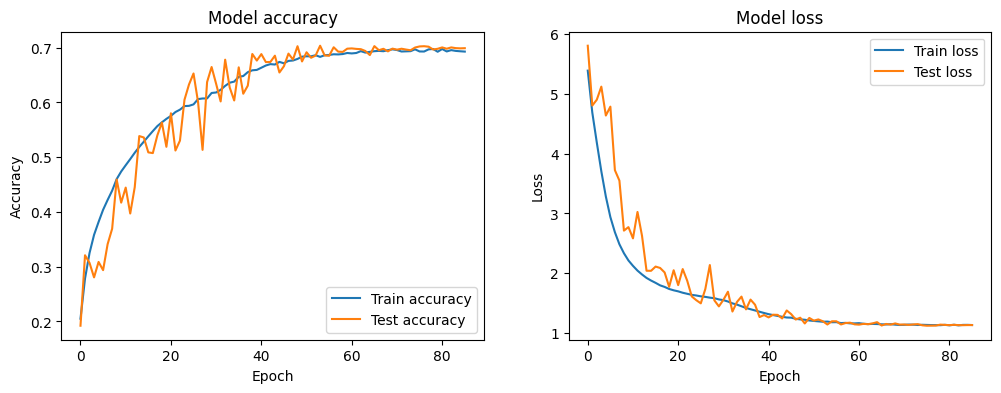

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10  # Reemplazar por tu dataset si es necesario
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Paso 1: Cargar el dataset CIFAR-10 (reemplazar con tus datos si es necesario)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)  # Cambia '10' por el número de clases de tu dataset
y_test = to_categorical(y_test, 10)

# Aumento de datos más agresivo
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)  # Asegurarse de que sea un float
    else:
        return float(lr * tf.math.exp(-0.1))  # Convertir a float

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # Cambia '10' por el número de clases de tu dataset

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado.h5')

print("Modelo guardado exitosamente como 'modelo_mejorado.h5'")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10  # Reemplazar por tu dataset si es necesario
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Paso 1: Cargar el dataset CIFAR-10 (reemplazar con tus datos si es necesario)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)  # Cambia '10' por el número de clases de tu dataset
y_test = to_categorical(y_test, 10)

# Aumento de datos más agresivo
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,  # Aumentar el desplazamiento
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3,  # Aumentar el zoom
    shear_range=0.3,
    brightness_range=[0.8, 1.2]  # Cambiar el brillo de las imágenes
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return float(lr * tf.math.exp(-0.05))  # Reducir más lentamente la tasa de aprendizaje

# Paso 3: Definir el modelo CNN mejorado con más capacidad
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales con más capacidad
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.002)))  # Aumentar a 1024 neuronas
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # Cambia '10' por el número de clases de tu dataset

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos y más épocas
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=150,  # Aumentar las épocas
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v2.h5')

print("Modelo guardado exitosamente como 'modelo_mejorado_v2.h5'")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - accuracy: 0.1029 - loss: 7.8029 - val_accuracy: 0.0856 - val_loss: 6.8414 - learning_rate: 1.0000e-04
Epoch 2/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.1018 - loss: 6.9394 - val_accuracy: 0.1024 - val_loss: 6.3389 - learning_rate: 1.0000e-04
Epoch 3/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.1030 - loss: 6.2721 - val_accuracy: 0.0947 - val_loss: 5.7817 - learning_rate: 1.0000e-04
Epoch 4/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.1026 - loss: 5.6421 - val_accuracy: 0.1093 - val_loss: 5.1432 - learning_rate: 1.0000e-04
Epoch 5/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.1037 - loss: 4.9851 - val_accuracy: 0.0965 - val_loss: 4.4901 - learning_rate: 1.0000e-04
Epoch 6/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.1040 - loss: 4.3359 - val_accuracy: 0.1011 - val_loss: 3.8800 - learning_rate: 1.0000e-04
Epoch 7/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 

KeyboardInterrupt: 

Epoch 1/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 66ms/step - accuracy: 0.2503 - loss: 5.4572 - val_accuracy: 0.2663 - val_loss: 5.6992 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 57ms/step - accuracy: 0.3994 - loss: 4.4191 - val_accuracy: 0.3141 - val_loss: 5.3812 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4522 - loss: 3.9008 - val_accuracy: 0.3429 - val_loss: 5.0412 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.4960 - loss: 3.4078 - val_accuracy: 0.3772 - val_loss: 4.6354 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.5220 - loss: 2.9962 - val_accuracy: 0.4730 - val_loss: 3.5095 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.5578 - loss: 2.6518 - val_accuracy: 0.4150 - val_loss: 3.7953 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 57ms/ste

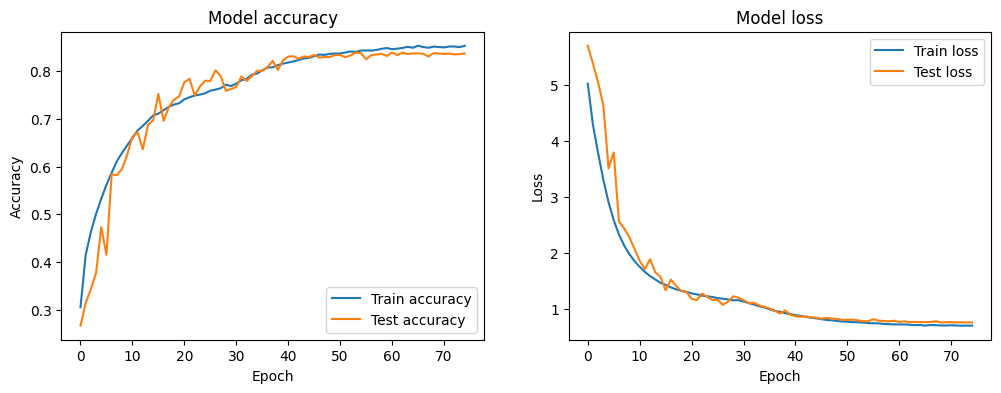

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Nueva importación

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Paso 3: Definir el modelo CNN mejorado
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=75,
                              validation_data=(X_test, y_test),
                              verbose=1,
                              callbacks=[early_stopping, lr_scheduler])


# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v2.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v2.h5'")


# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r /content/drive/MyDrive/dataset /content/

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 68ms/step - accuracy: 0.2141 - loss: 6.1706 - val_accuracy: 0.2998 - val_loss: 5.7859 - learning_rate: 1.0000e-04
Epoch 2/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 50ms/step - accuracy: 0.3575 - loss: 5.1119 - val_accuracy: 0.3120 - val_loss: 5.7017 - learning_rate: 1.0000e-04
Epoch 3/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4231 - loss: 4.4582 - val_accuracy: 0.3701 - val_loss: 4.8583 - learning_rate: 1.0000e-04
Epoch 4/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4620 - loss: 3.8554 - val_accuracy: 0.3987 - val_loss: 4.2710 - learning_rate: 1.0000e-04
Epoch 5/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5026 - loss: 3.3450 - val_accuracy: 0.3964 - val_loss: 4.0671 - learning_rate: 1.0000e-04
Epoch 6/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5367 - loss: 2.9116 - val_accuracy: 0.4735 - val_loss: 3.2203 - learning_rate: 1.0000e-04
Epoch 7/75
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accurac

Modelo guardado exitosamente como 'modelo_mejorado_v3.h5'
313/313 - 1s - 4ms/step - accuracy: 0.8286 - loss: 0.8024

Test accuracy: 0.8285999894142151


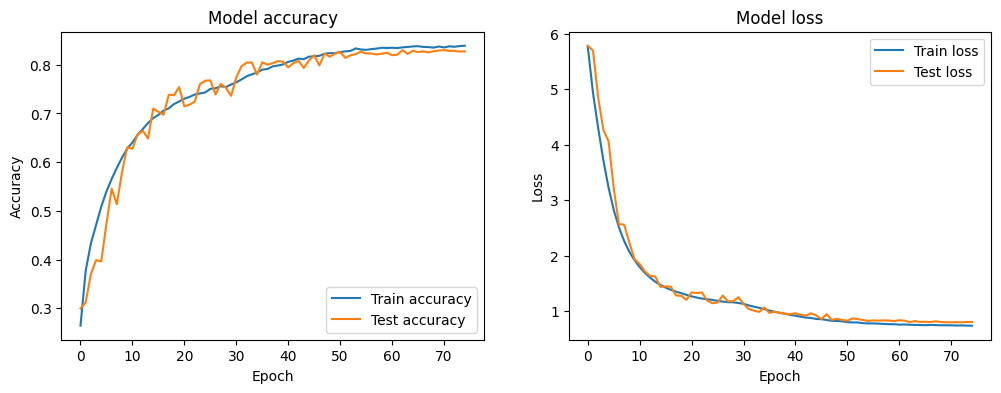

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Nueva importación

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

# Paso 3: Definir el modelo CNN mejorado (con una capa adicional y más filtros)
model = Sequential()

# Primer bloque de capas convolucionales (más filtros)
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Segundo bloque de capas convolucionales (más filtros)
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Tercer bloque de capas convolucionales (sin cambios)
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# **Nueva capa convolucional adicional** (ligero aumento de filtros)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Cuarto bloque de capas convolucionales (más filtros)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=75,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v3.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v3.h5'")

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.2563 - loss: 5.3608 - val_accuracy: 0.3159 - val_loss: 5.2093 - learning_rate: 1.0000e-04
Epoch 2/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.4137 - loss: 3.9725 - val_accuracy: 0.3478 - val_loss: 5.2106 - learning_rate: 1.0000e-04
Epoch 3/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.4623 - loss: 3.3240 - val_accuracy: 0.3874 - val_loss: 4.7653 - learning_rate: 1.0000e-04
Epoch 4/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5006 - loss: 2.9197 - val_accuracy: 0.4323 - val_loss: 4.1336 - learning_rate: 1.0000e-04
Epoch 5/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.5297 - loss: 2.6353 - val_accuracy: 0.4010 - val_loss: 4.5874 - learning_rate: 1.0000e-04
Epoch 6/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5426 - loss: 2.4409 - val_accuracy: 0.4484 - val_loss: 3.9671 - learning_rate: 1.0000e-04
Epoch 7/85
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/ste

Modelo guardado exitosamente como 'modelo_mejorado_v4.h5'
313/313 - 1s - 3ms/step - accuracy: 0.8507 - loss: 0.7146

Test accuracy: 0.8507000207901001


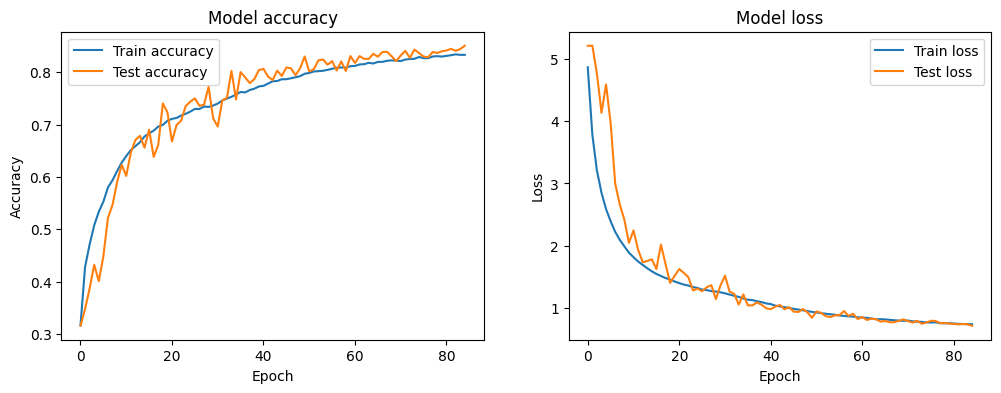

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.05))  # Ajustar el decrecimiento de la tasa de aprendizaje

# Modelo anterior con modificaciones mínimas
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo con un cambio en el optimizador a RMSprop
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v4.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v4.h5'")

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos más agresivo
datagen = ImageDataGenerator(
    rotation_range=40,  # Aumentar la rotación
    width_shift_range=0.2,  # Aumentar el desplazamiento horizontal
    height_shift_range=0.2,  # Aumentar el desplazamiento vertical
    zoom_range=0.2,  # Agregar zoom
    brightness_range=[0.8, 1.2],  # Cambiar el brillo de las imágenes
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.05))  # Ajuste en la reducción de la tasa de aprendizaje

# Modelo (similar al anterior que funcionó bien)
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos y 100 épocas
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,  # Aumentar el número de épocas a 100
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v5.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v5.h5'")

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.1003 - loss: 5.9192 - val_accuracy: 0.1294 - val_loss: 5.4556 - learning_rate: 1.0000e-04
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.1025 - loss: 5.0222 - val_accuracy: 0.0780 - val_loss: 4.1859 - learning_rate: 1.0000e-04
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.1045 - loss: 3.9693 - val_accuracy: 0.0685 - val_loss: 3.3120 - learning_rate: 1.0000e-04
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.1039 - loss: 3.1829 - val_accuracy: 0.1042 - val_loss: 2.8234 - learning_rate: 1.0000e-04
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.1010 - loss: 2.7286 - val_accuracy: 0.0999 - val_loss: 2.7097 - learning_rate: 1.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.1069 - loss: 2.4858 - val_accuracy: 0.1037 - val_loss: 2.6026 - learning_rate: 1.0000e-04
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 7

KeyboardInterrupt: 

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step - accuracy: 0.2566 - loss: 5.3840 - val_accuracy: 0.2472 - val_loss: 6.2283 - learning_rate: 1.0000e-04
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.4037 - loss: 4.0016 - val_accuracy: 0.2719 - val_loss: 5.9445 - learning_rate: 1.0000e-04
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4556 - loss: 3.3206 - val_accuracy: 0.3471 - val_loss: 5.0636 - learning_rate: 1.0000e-04
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4922 - loss: 2.9200 - val_accuracy: 0.3987 - val_loss: 4.4014 - learning_rate: 1.0000e-04
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5243 - loss: 2.6463 - val_accuracy: 0.4492 - val_loss: 3.9233 - learning_rate: 1.0000e-04
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5454 - loss: 2.4386 - val_accuracy: 0.5141 - val_loss: 2.7172 - learning_rate: 1.0000e-04
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 5

Modelo guardado exitosamente como 'modelo_mejorado_v6.h5'
313/313 - 1s - 3ms/step - accuracy: 0.8417 - loss: 0.7255

Test accuracy: 0.84170001745224


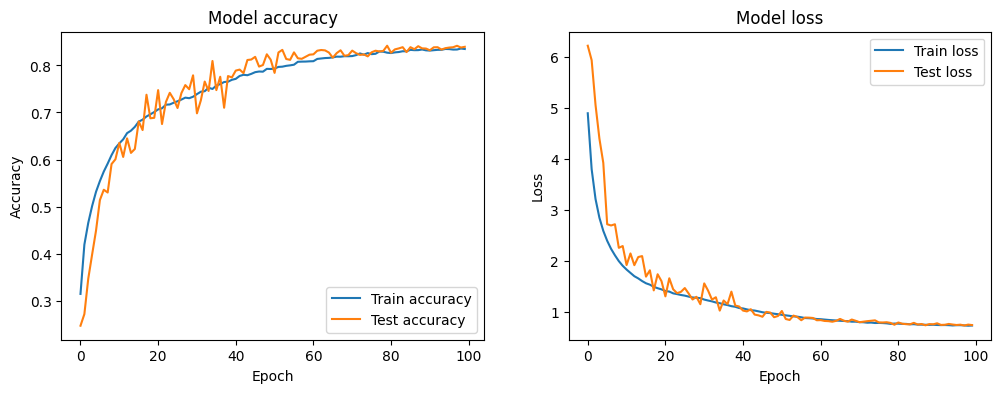

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajustar el generador de imágenes a los datos de entrenamiento
datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.05))

# Modelo (similar al anterior que funcionó bien)
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo con aumento de datos menos agresivo
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,  # Continuamos con 100 épocas
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v6.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v6.h5'")

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Paso 2: Preprocesar los datos
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Función para reducir la tasa de aprendizaje durante el entrenamiento
def scheduler(epoch, lr):
    if epoch < 30:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.05))  # Ajustar el decrecimiento de la tasa de aprendizaje

# Modelo anterior con modificaciones mínimas
model = Sequential()

# Primer bloque de capas convolucionales
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Segundo bloque de capas convolucionales
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Tercer bloque de capas convolucionales
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Cuarto bloque de capas convolucionales
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.002)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Aplanar la salida de las capas convolucionales
model.add(Flatten())

# Capas densas finales
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.002)))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Paso 4: Compilar el modelo con un cambio en el optimizador a RMSprop
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paso 5: Implementar Early Stopping y Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Paso 6: Entrenar el modelo
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, lr_scheduler])

# Guardar el modelo completo al final del entrenamiento
model.save('modelo_mejorado_v4.h5')
print("Modelo guardado exitosamente como 'modelo_mejorado_v4.h5'")

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.2585 - loss: 5.3687 - val_accuracy: 0.3478 - val_loss: 4.8464 - learning_rate: 1.0000e-04
Epoch 2/100
345/782 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.3976 - loss: 4.1221

KeyboardInterrupt: 